# COGS 108 - Final Project 

# Overview

Our project analyzes the life expectancies of various racial groups in America from 1900 to 2010. We started with a research question about analyzing the life expectancies of various groups on the basis of race and sex in America. From there, we formed a hypothesis about these trends based on our understanding of historical tensions and inequalities between these groups. We found datasets to analyze, and from there we proposed explanations based on our historical understandings. 

# Names

    - Yueying Dong
    - Aaron Apte
    - Sangwon Cho
    - Yaseen Khan
   

# Group Members IDs

- A13709617
- A13420131
- A99084696
- A1472028

# Research Question

From 1900 to 2010, which race/ethnic group (Black, White) and sex (male, female) have had the highest rise in life expectancy, how does the leading cause of death for each group change over time, and what is a plausible explanation for these changes? 

Prediction: Given the parametrized temporal range of 1900 to 2010, we assume that African Americans have experienced an increase in life expectancy; correlated by the increased demand for racial equality in the U.S. over the last few decades. Furthermore, due to the end of the AIDS crisis we assume the life expectancy of men to have exhibited a greater increase with respect to the total population. Therefore, black men would have the greatest increase in life expectancy. 


## Background and Prior Work

Given the racial inequalities through US history, most ethnic groups in the country were marginalized and discriminated against by the white population. In particular, African Americans suffered considerably under slavery and Jim Crow laws throughout most of the nineteenth and twentieth century. Life expectancy for African Americans was much lower compared to their white counterparts through a combination of racial violence, lack of resources, and overall low quality of life.(Bond, 2016) Moreover, past studies have shown that gender differences also contributes to the discrepancy in life expectancy between male and females (Ausrad, 2017). Knowing that during the last two decades, several political and economical factors improved the lives of many African Americans, we would like to see during this period,  which race and gender in U.S. has the highest increase in life expectancy, what is the leading cause of death for each race/gender, and what would be a plausible explanation for our observations.


References: 
       1. Lagging Life Expectancy for Black Men: A Public Health Imperative(2016) M. Jermane Bond, PhD corresponding author and Allen A. Herman, MD, PhD, Am J Public Health. Retrieved from:
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4984780/
This paper is related to our project because it demonstrates that black men have historically had the lowest life expectancy compared to black women, as well as white men/women
       2. Sex Differences in Lifespan (2017) Steven N. Austad, and Kathleen E. Fischer. Retrieved from:
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4932837/ 
This paper is related to our project because it shows that historically men have a lower life expectancy compared to females.


# Hypothesis


Given the parametrized temporal range of 1900 to 2010, we assume that African Americans have experienced an increase in life expectancy; correlated by the increased demand for racial equality in the U.S. over the last few decades. Furthermore, due to the end of the AIDS crisis we assume the life expectancy of men to have exhibited a greater increase with respect to the total population. Therefore, black men would have the greatest increase in life expectancy. 


# Dataset(s)

MAIN DATASET: 

Dataset Name: death rates and life expectancy at birth

Link to the dataset: https://data.cdc.gov/api/views/w9j2-ggv5/rows.csv?accessType=DOWNLOAD

Number of observations: 1044

Description : This dataset contains about 1044 entries about the average life expectancy and death rate from 1900-2015. This data is split between sex (male and female) and also split by race (black and white). 


SUPPLEMENTARY DATASET:

Dataset Name: Leading causes of death and numbers of deaths by sex race and hispanic origin - United states 1980 and 2009

Link to the dataset: https://catalog.data.gov/dataset/selected-trend-table-from-health-united-states-2011-leading-causes-of-death-and-numbers-of/resource/42bd5ce6-0e36-4081-b87c-24823eaeef18

Number of observations: 396

Description : This dataset contains 10 leading causes of death for each ethnic groups/sexs in 1980 and in 2009. The total measurement is 396 observations. The demographics of these people are split by sex (male and female), and then further split by ethnicity (White, Black/African American, American Indian/Alaska Native, Asian/Pacific Islander, and Hispanic/Latino).

# Setup

First, we will import all the library functions we need. All these libraries will be necessary in order to graph the functions we need to demonstrate the correlation between life expectancy, race, and sex.


In [65]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import patsy
import statsmodels.api as sm
import os

In [66]:
# load the data
# The death rates across the United States from 1960 to 2010
df = pd.read_csv('death_rate_and_life_expectancy.csv')

# The leading cause of death in the United States for people of difference races
df_death_cause = pd.read_csv('leading_cause_of_death_1980_2009.csv')

# Data Cleaning

First, we will drop the death rate column from our death rate and life expectancy table. This is because we are focusing on just the life expectancy, and so dropping this table will make our table easier to work with.

Next, we are going to drop any rows that contain data from after the year 2009. Our secondary dataset contains information on the leading causes of death up to 2009. Therefore, we can disregard any data that comes outside the scope of this timeframe.

Finally, we will drop any null values from our dataset.

In [67]:
# Dropping out unnecessary column for the death rate data
df = df.drop(['Age-adjusted Death Rate'], axis = 1) # Drop the unnecessary column
df = df[df['Year'] < 2010]  # Drop rows that contain data from years after 2010
df = df.dropna(axis = 0) # Drop rows containing null data

In our leading cause of death table, we will drop any unnecessary columns from our secondary dataset: Rank Order and Flag. These values were used in the study for which the data was collected, likely for their internal processing, but we aren't particularly concerned with the rank they came in since we don't need to associate any sort of ID with our entries besides their table row, and Flag seems to be used internally for their study. 

We will also remove generalized results, such as "all causes" and "all persons" because we want to analyze the data based on race/sex, rather than a general set.

Finally, we will drop any null values from our dataset.

In [68]:
# Dropping out null values and unnecessary columns for the leading cause of death data
df_death_cause = df_death_cause[['Group','Year','Cause of death','Deaths']]
df_death_cause.dropna(axis = 0)
df_death_cause = df_death_cause[df_death_cause['Cause of death'] != 'All causes']
df_death_cause = df_death_cause[df_death_cause['Group'] != 'All persons']

In [69]:
df

,Year,Race,Sex,Average Life Expectancy (Years)
6,2009,All Races,Both Sexes,78.5
7,2008,All Races,Both Sexes,78.2
8,2007,All Races,Both Sexes,78.1
9,2006,All Races,Both Sexes,77.8
10,2005,All Races,Both Sexes,77.6
11,2004,All Races,Both Sexes,77.5
12,2003,All Races,Both Sexes,77.6
13,2002,All Races,Both Sexes,77.0
14,2001,All Races,Both Sexes,77.0
15,2000,All Races,Both Sexes,76.8


In [70]:
df_death_cause

,Group,Year,Cause of death,Deaths
12,Male,1980,Diseases of heart,405661.0
13,Male,1980,Malignant neoplasms,225948.0
14,Male,1980,Unintentional injuries,74180.0
15,Male,1980,Cerebrovascular diseases,69973.0
16,Male,1980,Chronic obstructive pulmonary diseases,38625.0
17,Male,1980,Pneumonia and influenza,27574.0
18,Male,1980,Suicide,20505.0
19,Male,1980,Chronic liver disease and cirrhosis,19768.0
20,Male,1980,Homicide,18779.0
21,Male,1980,Diabetes mellitus,14325.0


# Data Analysis & Results

After cleaning up our data, we are ready to start analyzing it. We first want to get the average life expectancies of females and males based on race:

In [71]:
# Get average life expectancies
# First, get the averages for females and males of all races
all_race_avg_year = df[df['Race'] =='All Races']
all_f = all_race_avg_year[all_race_avg_year['Sex'] == 'Female']['Average Life Expectancy (Years)'].mean()
all_m = all_race_avg_year[all_race_avg_year['Sex'] == 'Male']['Average Life Expectancy (Years)'].mean()

# Next, get the averages for black females and males 
black_avg_year = df[df['Race'] =='Black']
black_f = black_avg_year[black_avg_year['Sex'] == 'Female']['Average Life Expectancy (Years)'].mean()
black_m = black_avg_year[black_avg_year['Sex'] == 'Male']['Average Life Expectancy (Years)'].mean()

# Finally, get the averages for white females and males
white_avg_year = df[df['Race'] =='White']
white_f = white_avg_year[white_avg_year['Sex'] == 'Female']['Average Life Expectancy (Years)'].mean()
white_m = white_avg_year[white_avg_year['Sex'] == 'Male']['Average Life Expectancy (Years)'].mean()

# Construct a DataFrame to represent our average data
average_life_expectancy = pd.DataFrame([all_f,black_f,white_f,],['all','black','white'],['female'])
average_life_expectancy['male'] = all_m,black_m,white_m
average_life_expectancy

,female,male
all,68.655455,63.454545
black,60.174545,55.041818
white,69.530000,64.265455


In addition to a table, we can also present this data in an alternate way. To do so, we can construct a bar graph to show the differences in average life expectancy:

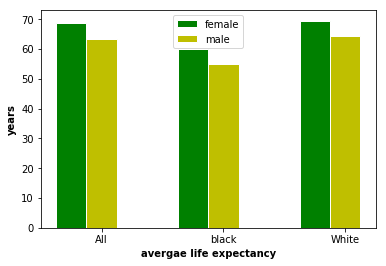

In [72]:
# Shorthand variables
width = 0.25
second_avg = [r + width for r in np.arange(3)]

# Construct our bar graph
plt.bar(np.arange(3),average_life_expectancy['female'] ,color='g',width=width, edgecolor='white', label='female')
plt.bar(second_avg, average_life_expectancy['male'], color='y', width=width, edgecolor='white', label='male')
plt.xticks([r + width for r in np.arange(3)], ['All', 'black', 'White'])
plt.xlabel('avergae life expectancy', fontweight='bold')
plt.ylabel('years', fontweight='bold')
plt.legend()


plt.show()

From here, we can begin to compare life expectancies based on sex. 

Without regard to race, we can plot the historical trends in life expectancy between males and females.

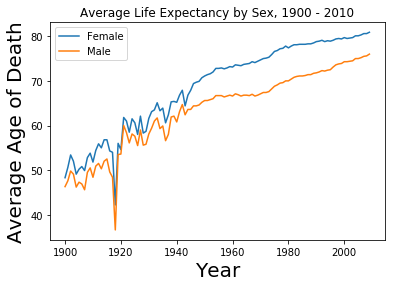

In [73]:
# Shorthand variable
all_race = df[df['Race'] == 'All Races']

# Flip ordering of data to have it start from earlier to later time period
all_race = all_race[::-1]

# Extract female and male data
all_race_female = all_race[all_race['Sex'] == 'Female']
all_race_male = all_race[all_race['Sex'] == 'Male']

# Construct x-axes for female and male
x_axis_female = np.arange(1900, 1900+len(all_race_female['Race']))
x_axis_male = np.arange(1900, 1900+len(all_race_male['Race']))

# Plot lines
plt.plot(x_axis_female, all_race_female['Average Life Expectancy (Years)'], label="Female")
plt.plot(x_axis_male, all_race_male['Average Life Expectancy (Years)'], label="Male")

# Set labels 
plt.xlabel('Year', fontsize=20)
plt.ylabel('Average Age of Death', fontsize=20)
plt.title('Average Life Expectancy by Sex, 1900 - 2010')
plt.legend()

plt.show()

#explanation: the general trend is that male live shorter than female, no matter which race they are.

From the graph, there are several things to analyze. Firstly, the general trend of life expectancy for both males and females has been increasing over the years. This makes sense, as increasing industrialization and legislation to improve the quality of life means that naturally people will live longer. 

Another thing to note is that there is a sharp dip in life expectancy for both men and women in the late 1910s. The reason for this is because of the Spanish influenza pandemic in 1918, which caused mass deaths in America. In addition, there have been several smaller dips in the graph, particuarly until 1945, which was the end of World War II, which marked a period of high economic growth in America, as well as the civil rights movement, which caused a significant increase in the quality of life of American citizens.

Bearing this information in mind, we can now go deeper and start looking at differences in average life expectancy based on both race and sex.

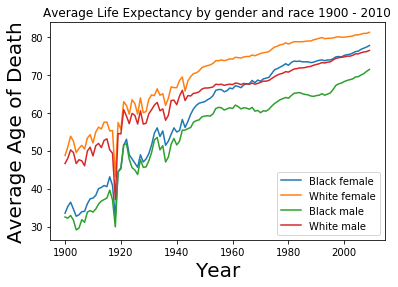

,slope,intercept
black female,0.419856,-760.434371
black male,0.350116,-629.260075
white female,0.297758,-512.437211
white male,0.263009,-449.786153


In [74]:
# Shorthand variables
black = df[df['Race'] == 'Black']
white = df[df['Race'] == 'White']

# Flip ordering of data to have it start from earlier to later time period
black = black[::-1]
white = white[::-1]

# Extract female and male data
black_female = black[black['Sex'] == 'Female']
white_female = white[white['Sex'] == 'Female']

black_male = black[black['Sex'] == 'Male']
white_male = white[white['Sex'] == 'Male']

# Construct x-axes for female and male
x_axis_blackfemale = np.arange(1900, 1900+len(black_female['Race']))
x_axis_whitefemale = np.arange(1900, 1900+len(white_female['Race']))

x_axis_blackmale = np.arange(1900, 1900+len(black_male['Race']))
x_axis_whitemale = np.arange(1900, 1900+len(white_male['Race']))

# Plot lines
plt.plot(x_axis_blackfemale, black_female['Average Life Expectancy (Years)'], label="Black female")
plt.plot(x_axis_whitefemale, white_female['Average Life Expectancy (Years)'], label="White female")
plt.plot(x_axis_blackmale, black_male['Average Life Expectancy (Years)'], label="Black male")
plt.plot(x_axis_whitemale, white_male['Average Life Expectancy (Years)'], label="White male")

# Set labels
plt.xlabel('Year', fontsize=20)
plt.ylabel('Average Age of Death', fontsize=20)
plt.title('Average Life Expectancy by gender and race 1900 - 2010')
plt.legend()

plt.show()

# We can also insert 2 best fitting lines, 1 is before 1980, 1 is after 1980, to see which group has the most increase
a,b = np.polyfit(x_axis_blackfemale, black_female['Average Life Expectancy (Years)'], 1)
c,d = np.polyfit(x_axis_blackmale, black_male['Average Life Expectancy (Years)'], 1)
e,f = np.polyfit(x_axis_whitefemale, white_female['Average Life Expectancy (Years)'], 1)
g,h = np.polyfit(x_axis_whitemale, white_male['Average Life Expectancy (Years)'], 1)

linear_reg = pd.DataFrame([a,c,e,g],['black female','black male','white female','white male'],['slope'])
linear_reg['intercept'] = [b,d,f,h]
linear_reg

From the graph and our best-fit line, we can observe several things. Firstly, there is a clear difference in the average life expectancy of black people compared to their white counterparts for much of the early 20th century. Largely, this can be attributed to the Reconstruction era following the Civil War, during which time former slaves attempted to assimilate into American society as free persons. However, given the violent prejudice and discrimination during this time period, it is unsurprising that black people had much shorter lives. 

This large divide, however, begins to close following the end of World War II. As we noted previously, the economic boom from the 1950s onwards, as well as the Civil Rights Movement, contributed to ending the volatility in the average life expectancy for all people and helped improve life for marginalized groups in American society. 

Another interesting facet of this data is that the life expectancy of black females surpassed that of white males from the early 1960s onwards. It is possible that the intersectional black rights movement and second-wave feminism contributed to the sharp rise of life expectancy for black females.

From the slope-intercent data of our best-fit lines, we can see that black females have had the sharpest increase in life expectancy, while white males have had the smallest rate of increase. It is also interesting to note that black females started with the lowest initial life-expectancy, while white males had the highest. From the data, one possible conclusion which can be formed is that the sharpest increase in life-expectancy is largely attributed towards race instead of sex.

Now, we can take a look at our secondary dataset and explore the top three leading causes of death for these different groups:

In [75]:
# First we will build our DataFrame for leading causes of death in 1980

# Create shorthand variables for race and sex
df_death_cause_1980 = df_death_cause[df_death_cause['Year'] == 1980]
bf1980 = df_death_cause_1980[df_death_cause_1980['Group'] == 'Black or African American female']
bm1980 = df_death_cause_1980[df_death_cause_1980['Group'] == 'Black or African American male']
wf1980 = df_death_cause_1980[df_death_cause_1980['Group'] == 'White female']
wm1980 = df_death_cause_1980[df_death_cause_1980['Group'] == 'White male']

# Resets indices in order to get sorted causes of death
bf1980 = bf1980.reset_index(drop=True)
bm1980 = bm1980.reset_index(drop=True)
wf1980 = wf1980.reset_index(drop=True)
wm1980 = wm1980.reset_index(drop=True)

# Sort values based from most to least common causes of death
bf1980.sort_values("Deaths", inplace=True, ascending=False)
bm1980.sort_values("Deaths", inplace=True, ascending=False)
wf1980.sort_values("Deaths", inplace=True, ascending=False)
wm1980.sort_values("Deaths", inplace=True, ascending=False)

# Build DataFrame for top three leading causes of death in 1980
top_three_1980 = [[bf1980['Cause of death'][0], bm1980['Cause of death'][0], wf1980['Cause of death'][0], wm1980['Cause of death'][0]],
                  [bf1980['Cause of death'][1], bm1980['Cause of death'][1], wf1980['Cause of death'][1], wm1980['Cause of death'][1]],
                  [bf1980['Cause of death'][2], bm1980['Cause of death'][2], wf1980['Cause of death'][2], wm1980['Cause of death'][2]]]

df_top_three_1980 = pd.DataFrame(top_three_1980, columns=["Black female", "Black male", "White female", "White male"])

# Next we will build our DataFrame for leading causes of death in 2009

# Create shorthand variables for race and sex
df_death_cause_2009 = df_death_cause[df_death_cause['Year'] == 2009]
bf2009 = df_death_cause_2009[df_death_cause_2009['Group'] == 'Black or African American female']
bm2009 = df_death_cause_2009[df_death_cause_2009['Group'] == 'Black or African American male']
wf2009 = df_death_cause_2009[df_death_cause_2009['Group'] == 'White female']
wm2009 = df_death_cause_2009[df_death_cause_2009['Group'] == 'White male']

# Resets indices in order to get sorted causes of death
bf2009 = bf2009.reset_index(drop=True)
bm2009 = bm2009.reset_index(drop=True)
wf2009 = wf2009.reset_index(drop=True)
wm2009 = wm2009.reset_index(drop=True)

# Sort values based from most to least common causes of death
bf2009.sort_values("Deaths", inplace=True, ascending=False)
bm2009.sort_values("Deaths", inplace=True, ascending=False)
wf2009.sort_values("Deaths", inplace=True, ascending=False)
wm2009.sort_values("Deaths", inplace=True, ascending=False)

# Build DataFrame for top three leading causes of death in 2009
top_three_2009 = [[bf2009['Cause of death'][0], bm2009['Cause of death'][0], wf2009['Cause of death'][0], wm2009['Cause of death'][0]],
                  [bf2009['Cause of death'][1], bm2009['Cause of death'][1], wf2009['Cause of death'][1], wm2009['Cause of death'][1]],
                  [bf2009['Cause of death'][2], bm2009['Cause of death'][2], wf2009['Cause of death'][2], wm2009['Cause of death'][2]]]

df_top_three_2009 = pd.DataFrame(top_three_2009, columns=["Black female", "Black male", "White female", "White male"])

In [76]:
df_top_three_1980

,Black female,Black male,White female,White male
0,Diseases of heart,Diseases of heart,Diseases of heart,Diseases of heart
1,Malignant neoplasms,Malignant neoplasms,Malignant neoplasms,Malignant neoplasms
2,Cerebrovascular diseases,Unintentional injuries,Cerebrovascular diseases,Unintentional injuries


In [77]:
df_top_three_2009

,Black female,Black male,White female,White male
0,Diseases of heart,Diseases of heart,Diseases of heart,Diseases of heart
1,Malignant neoplasms,Malignant neoplasms,Malignant neoplasms,Malignant neoplasms
2,Cerebrovascular diseases,Unintentional injuries,Chronic lower respiratory diseases,Unintentional injuries


There are several observations to be made in this chart. Firstly, heart disease and malignant neoplasms have consistently been the top two leading causes of death for all groups in both 1980 to 2009. Additionally, unintentional injuries have been the third leading cause of death for males, while cerebrovascular diseases have been the third leading cause of death for females in 1980. This has not changed in 2009 for any group except white females, whose third leading cause of death changed to chronic lower respiratory diseases.

Before we analyze the reason for this, we will first break down the ratio of how common each of these causes of death are in comparison to each other within each group. First, let's preprocess the data:

In [83]:
# We will setup plotting our graphs of the above table

# Create DataFrame of deaths ratios for the top three causes of death in 1980 for each group
df_top_three_1980_stats = pd.DataFrame(
                        [[bf1980['Deaths'][0]/bf1980['Deaths'].sum(), bm1980['Deaths'][0]/bm1980['Deaths'].sum(), 
                         wf1980['Deaths'][0]/wf1980['Deaths'].sum(), wm1980['Deaths'][0]/wm1980['Deaths'].sum()],
                        [bf1980['Deaths'][1]/bf1980['Deaths'].sum(), bm1980['Deaths'][1]/bm1980['Deaths'].sum(), 
                         wf1980['Deaths'][1]/wf1980['Deaths'].sum(), wm1980['Deaths'][1]/wm1980['Deaths'].sum()],
                        [bf1980['Deaths'][2]/bf1980['Deaths'].sum(), bm1980['Deaths'][2]/bm1980['Deaths'].sum(), 
                         wf1980['Deaths'][2]/wf1980['Deaths'].sum(), wm1980['Deaths'][2]/wm1980['Deaths'].sum()]], 
                        columns=["Black female", "Black male", "White female", "White male"])

# Create DataFrame of deaths ratios for the top three causes of death in 2009 for each group
df_top_three_2009_stats = pd.DataFrame(
                        [[bf2009['Deaths'][0]/bf2009['Deaths'].sum(), bm2009['Deaths'][0]/bm2009['Deaths'].sum(), 
                         wf2009['Deaths'][0]/wf2009['Deaths'].sum(), wm2009['Deaths'][0]/wm2009['Deaths'].sum()],
                        [bf2009['Deaths'][1]/bf2009['Deaths'].sum(), bm2009['Deaths'][1]/bm2009['Deaths'].sum(), 
                         wf2009['Deaths'][1]/wf2009['Deaths'].sum(), wm2009['Deaths'][1]/wm2009['Deaths'].sum()],
                        [bf2009['Deaths'][2]/bf2009['Deaths'].sum(), bm2009['Deaths'][2]/bm2009['Deaths'].sum(), 
                         wf2009['Deaths'][2]/wf2009['Deaths'].sum(), wm2009['Deaths'][2]/wm2009['Deaths'].sum()]], 
                        columns=["Black female", "Black male", "White female", "White male"])

Now that we've processed the data, we can begin graphing it:

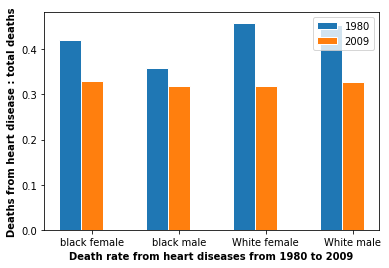

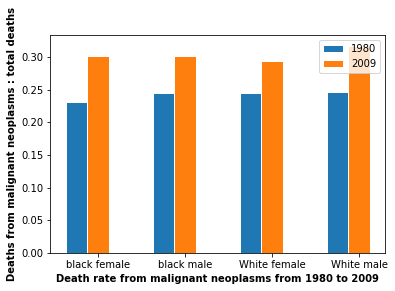

In [79]:
# Variables for printing bar graphs
width = 0.25
second = [r + width for r in np.arange(4)]

# Plot data for heart disease in 1980
plt.bar(np.arange(4), df_top_three_1980_stats.iloc[0],width=width, edgecolor='white', label='1980')
plt.bar(second, df_top_three_2009_stats.iloc[0], width=width, edgecolor='white', label='2009')
plt.xticks([r + width for r in np.arange(4)], ['black female', 'black male', 'White female', 'White male'])

plt.xlabel('Death rate from heart diseases from 1980 to 2009', fontweight='bold')
plt.ylabel('Deaths from heart disease : total deaths', fontweight='bold')
plt.legend()
plt.show()

# Plot data for heart disease in 2009
plt.bar(np.arange(4), df_top_three_1980_stats.iloc[1],width=width, edgecolor='white', label='1980')
plt.bar(second, df_top_three_2009_stats.iloc[1], width=width, edgecolor='white', label='2009')
plt.xticks([r + width for r in np.arange(4)], ['black female', 'black male', 'White female', 'White male'])

plt.xlabel('Death rate from malignant neoplasms from 1980 to 2009', fontweight='bold')
plt.ylabel('Deaths from malignant neoplasms : total deaths', fontweight='bold')
plt.legend()
plt.show()

From graphing the ratios of the two leading causes of death, we can observe several things. First is that white females in the 1980s had the highest ratio of death from heart disease, with it accounting for almost 46% of the deaths in the group, while black males had the lowest ratio of death from heart disease, at around 36%. In addition, black females had a slightly lower ratio of heart disease compared to white males - around 42% compared to 45%. The ratio of heart disease compared to other factors of death are both high and around equal between white males and females. It is slightly lower in black females, but is significantly lower compared to black males. These ratios decreased significantly from 1980 to 2009, to around 31-33% for all groups. It is difficult to analyze the reason for this trend, given that there is such a wide temoral gap between the data collection, but one possible reason for the shift towards equal ratios in 2009 may be that  modern medical solutions have significantly decreased the risk of death from heart disease.

The second leading cause of death - malignant neoplasms - is slightly more different compared to the first. There is a smaller disproportion between different groups, with it accounting for around 24% of all deaths in every groups. This number has increased slightly in 2009, accounting for around 30% of all deaths for every group. That these ratios seem to be equal and increasing between all groups may indicate a national trend, perhaps as a result of a change in lifestyle in the decades. 

# Ethics & Privacy

Our data is publicly available for use and therefore does not violate any privacy issues. A concern that appeared was the use of ages in our supplementary dataset. However, the data we use to represent different ages are average life expectancies. Therefore, in compliance with the Safe Harbour method, although average ages are the means of individual ages and therefore Personal Health Information(PHI), is not considered as PHI. The reason is that the average life expectancies alone cannot be used to identify individuals in our data. Nonetheless, other personal information is not present to correlate the age expectancies to reducing the "distinguishability" factor.

Initially, we were concerned that our main dataset would be biased as it contains data to limited ethnicities. However, in  further processing, we were able to remove certain data from our supplementary dataset to limit our scope to ethnicities, resulting in ethnicities of white and black male/female. On a similar note, we have removed data of years before 1980 from our main dataset to provide equal comparison between our two datasets.
Therefore, we might have limited our external validity due to a restricted scope, but maintained our internal validity as to remove confounding variables for our analysis. 

# Conclusion & Discussion

Culmination of this project has extended insight into the question we defined, and has provided support for our initial hypothesis. 

To begin our data analysis we first restricted the domain of our research to exhibit synchronicity among the data we obtained. We utilized two datasets; a primary dataset and a supplemental dataset. The primary dataset established itself as the foundation of our project by explicitly delimiting our research question. The dataset provided 1044 entries concerning the average life expectancies and death rates from 1900-2015; distributing the data to include information regarding differentials of sex (male and female) and race (black and white). The supplementary dataset compiled the leading causes of death and the coordinated statistics, segmenting the data according to sex and race in the U.S. from 1980-2009. The dataset included 396 observations differentiating the data among different ethnicities. 

We began by importing the library functions in python to effectively serve as a foundation for our subsequent code, and then loaded the datasets into defined data frames to tangibly manipulate the data. The primary dataset initially contained information regarding the death rates of the population; something which we did not concern ourselves with, so we dropped the correlated data to eliminate the variable from our analysis. Conjunctive analysis of the datasets necessitated data cleaning procedures to account for the overlap that occurred. We then dropped the data after the year 2010 to account for the boundaries of both datasets. The secondary dataset included inessential columns (used for internal processing) of data that were dropped to clean and restrict our analysis appropriately. 

With respect to the analytical procedures, we first plotted the average life expectancy by gender and race to create a visualization of the data and denote gravitations of the dataset. This created an explicit representation of the subject matter; explicating the purpose of our project. We were able to concretely conclude the average lifespan of females to greater than males in all regards.
 
Sequential analysis led us to linearly plot the temporal change of life expectancy with respect to gender from 1900 to 2010. Visual analysis of the graphs showed a drop in values in the late 1910’s for both males, and females. We explained this trend to be caused by the Spanish influenza that plagued the world and depressed the average life span in the U.S. by 10 years. While we noticed positive linear growth in the data following the 1918 dip; there was oscillatory growth as fluctuations during World War II directly impacted the life span of the general population during the 1940’s. Following the war, there was a steady-state growth factor in the data trending upwards; in relation to the economic growth following the war, coupled with the civil rights movement, the average life expectancy rose. 

The generated linear plot visualized the data and denoted that females exhibited a greater life span as opposed to males who on average lived shorter lives; irregardless of their race. The finding that females lived longer lives prompted us to visualize the life expectancy data by both gender and race as a linear plot. Python-assisted linear regression shows that black females and white females lives longer lives than black males and white males respectively. Breakdown of the linearity denotes the slope to correlate to the temporal rate of change associated with life expectancy.

We initially hypothesized that black males would exhibit the largest increase in life expectancy. However, in analysis of the linear regression data we see that black females actually show the greatest increase in life expectancy; as indicated by the greatest slope among the variables. 
Extending this analysis shows black males to experience the next greatest increase in life expectancy, followed by white females, and lastly, white males. While we correctly hypothesized African American’s to have experienced a greater increase in life expectancy, our assumption that males would have expressed a greater increase than women was found to be false according to our data. 

This project has shed light on a demographically restricted analysis of life expectancy fluctuations from 1900-2010. By controlling the variables and visualizing the data we collected, we were able to analytically determine trends within our dataset; presenting a foundation of understanding relative to the populations (delimited by race and gender) degree of change with respect to life expectancy (in years). Positive linearity was exhibited amongst the data and shows that sociocultural / socioeconomic factors were not normalized in the distribution of data. Thus, external factors associated with the parametrized population group could offer insight into correlated societal trends. 